Implementation of K-Means algorithm with TensorFlow

Code snippet to mount the google drive on colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Mention the location of your dataset on google drive

In [0]:
cd '/content/drive/My Drive/DataSets'


/content/drive/My Drive/DataSets


Importing required libraries for k-means clustering

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

Code to read the dataset csv file and print the first few records

In [0]:
data_records = pd.read_csv("/content/drive/My Drive/DataSets/data.csv")
data_records.head()

,DATE,T10Y2Y,NASDAQCOM_PCH
0,6/2/76,0.71,0.39859
1,6/3/76,0.70,0.11343
2,6/4/76,0.77,-0.57784
3,6/7/76,0.79,-0.60399
4,6/8/76,0.79,-0.11465


Print entire dataset

In [0]:
data_records

,DATE,T10Y2Y,NASDAQCOM_PCH
0,6/2/76,0.71,0.39859
1,6/3/76,0.70,0.11343
2,6/4/76,0.77,-0.57784
3,6/7/76,0.79,-0.60399
4,6/8/76,0.79,-0.11465
5,6/9/76,0.82,-0.19513
6,6/10/76,0.86,0.41403
7,6/11/76,0.83,0.45814
8,6/14/76,0.83,0.78668
9,6/15/76,0.83,0.05656


Specify the columns used for clustering

In [0]:
vectors_set1 = data_records[['T10Y2Y','NASDAQCOM_PCH']]
print(vectors_set1)

       T10Y2Y  NASDAQCOM_PCH
0        0.71        0.39859
1        0.70        0.11343
2        0.77       -0.57784
3        0.79       -0.60399
4        0.79       -0.11465
5        0.82       -0.19513
6        0.86        0.41403
7        0.83        0.45814
8        0.83        0.78668
9        0.83        0.05656
10       0.81        0.54268
11       0.79        0.88834
12       0.82        0.36781
13       0.85        0.11105
14       0.80       -0.67665
15       0.80       -0.39089
16       0.82        0.68393
17       0.81        0.27840
18       0.84       -0.19989
19       0.84        0.26705
20       0.84        0.23305
21       0.86       -0.04429
22       0.85        0.66460
23       0.85       -0.02207
24       0.90        0.20971
25       1.01        0.76000
26       1.04        0.50284
27       1.03        0.03263
28       1.03        0.51104
29       1.05        0.08654
...       ...            ...
10409    0.17       -0.78647
10410    0.14       -1.31976
10411    0.16 

Plot the graph for k-means

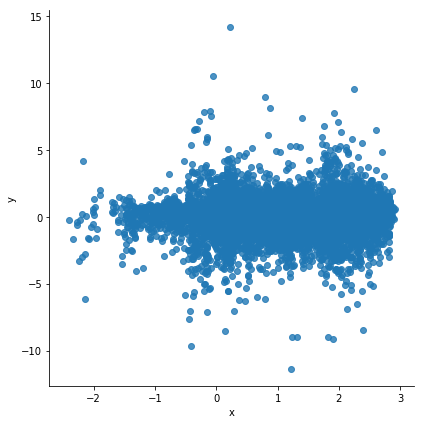

In [0]:
vectors_set = []

for i in range(len(vectors_set1)):
  vectors_set.append([vectors_set1['T10Y2Y'][i], vectors_set1['NASDAQCOM_PCH'][i]])

df = pd.DataFrame({"x": [v[0] for v in vectors_set], "y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, height=6)
plt.show()

Estimate the k - number of clusters using Elbow technique

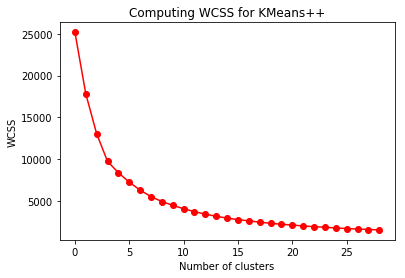

In [0]:
from sklearn.cluster import KMeans

# Use the Elbow method to find a good number of clusters using WCSS

#WCSS means (within-cluster sums of squares)
#Also, minimizing the WCSS (within-cluster sums of squares) will necessarily maximize the distance between clusters.

vals = vectors_set1.select_dtypes(include=[np.number]).fillna(0).values
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(vals)
    wcss.append(kmeans.inertia_)
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

According to Elbow method, the above graph shows that the optimal value for k (number of clusters) is 3

Code to implement k-means algorithm

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


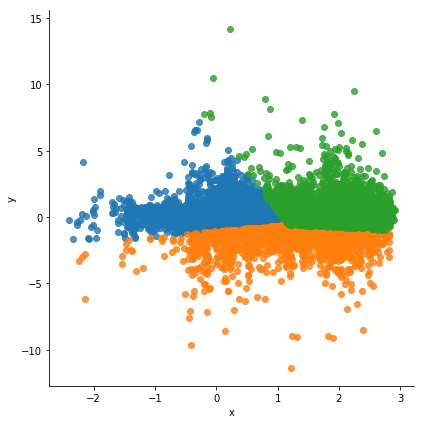

In [0]:
# k-means algorithm
vectors = tf.constant(vectors_set)
num_clusters = 3
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [num_clusters, -1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat(axis=0, values=[
    tf.reduce_mean(
        tf.gather(vectors,
                  tf.reshape(
                      tf.where(
                          tf.equal(assignments, c)
                      ), [1, -1])
                  ), axis=[1])
    for c in range(num_clusters)])

update_centroides = tf.assign(centroides, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, height=6, hue="cluster", legend=False)
plt.show()

Team: transformers-stock-market-prediction

Business Objective:



The main objective of this project is to predict the bubble formation and next recession based on several factors such as yields on short-term and long-term maturity bonds, NASDAQ index, Gross Domestic Product growth rate, Unemployment rate and the inverted yield curve. These factors are the strong indicators in determining the probability of upcoming recession.

DataSet:



We are using dataset with NASDAQ and Yield curve with the difference of 10-year and 2 year treasury notes. The dataset can be find on the common google drive under “transformers-stock-market-prediction” folder

Link of dataset on drive:



https://docs.google.com/spreadsheets/d/1a0N1mEgPjB8J15TxJsWW_BGDpdhKFk-M7MK1lIDNsn0/edit?usp=sharing



Data Interpretation:


Below is the data interpretation derived after applying unsupervised clustering algorithms on the data set:



1. Inverted Yield curve – The yield on long term investment (10 year) is lower than the yield on short term investment (2 year)
2. Real GDP - Growth rate less than 2% indicates Bubble formation and less than 0% or negative values indicate Recession period.
3. The GDP values goes down when the NASDAQ index is decreased
4. Unemployment level - As the value of NASDAQ composite index decreases, the rate of unemployment increases.